# Fashion classification

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

C:\Users\Rajit_Sanghvi\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Rajit_Sanghvi\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Rajit_Sanghvi\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)

Bad key "text.kerning_factor" on line 4 in
C:\Users\Rajit_Sanghvi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

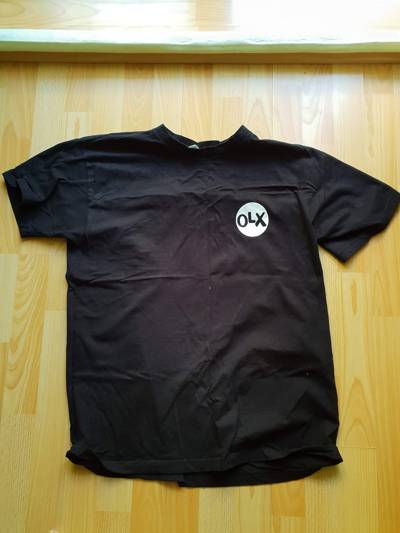

In [3]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [4]:
img = load_img(fullname, target_size=(299, 299))

In [5]:
x = np.array(img)
x.shape

(299, 299, 3)

## Pre-trained convolutional neural networks

In [5]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [7]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

In [8]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [9]:
X = preprocess_input(X)

In [10]:
pred = model.predict(X)

In [11]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.67924494),
  ('n02916936', 'bulletproof_vest', 0.03960036),
  ('n04370456', 'sweatshirt', 0.035299625),
  ('n03710637', 'maillot', 0.010884151),
  ('n04525038', 'velvet', 0.0018057632)]]

# Transfer learning

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [14]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [15]:
X, y = next(train_ds)

In [16]:
y[:5]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [18]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [19]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [20]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 176s 2s/step - loss: 1.1938 - accuracy: 0.6767 - val_loss: 0.8286 - val_accuracy: 0.7683
Epoch 2/10
96/96 [==============================] - 146s 2s/step - loss: 0.5269 - accuracy: 0.8312 - val_loss: 1.0777 - val_accuracy: 0.7390
Epoch 3/10
96/96 [==============================] - 136s 1s/step - loss: 0.3216 - accuracy: 0.8898 - val_loss: 0.9190 - val_accuracy: 0.7683
Epoch 4/10
96/96 [==============================] - 147s 2s/step - loss: 0.2126 - accuracy: 0.9273 - val_loss: 0.9252 - val_accuracy: 0.7859
Epoch 5/10
96/96 [==============================] - 233s 2s/step - loss: 0.1872 - accuracy: 0.9368 - val_loss: 0.8179 - val_accuracy: 0.8035
Epoch 6/10
96/96 [==============================] - 312s 3s/step - loss: 0.1390 - accuracy: 0.9531 - val_loss: 0.9624 - val_accuracy: 0.7801
Epoch 7/10
96/96 [==============================] - 312s 3s/step - loss: 0.0766 - accuracy: 0.9736 - val_loss: 1.1556 - val_accuracy: 0.7801
Epoch 8/10
96

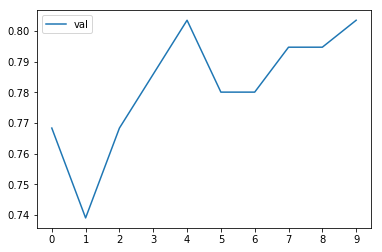

In [21]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

# Adjusting the learning rate

In [22]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [23]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 [==============================] - 102s 1s/step - loss: 1.9367 - accuracy: 0.3501 - val_loss: 1.6502 - val_accuracy: 0.4633
Epoch 2/10
96/96 [==============================] - 103s 1s/step - loss: 1.3935 - accuracy: 0.5645 - val_loss: 1.2879 - val_accuracy: 0.5836
Epoch 3/10
96/96 [==============================] - 107s 1s/step - loss: 1.1469 - accuracy: 0.6454 - val_loss: 1.1026 - val_accuracy: 0.6510
Epoch 4/10
96/96 [==============================] - 101s 1s/step - loss: 1.0051 - accuracy: 0.6819 - val_loss: 0.9864 - val_accuracy: 0.7097
Epoch 5/10
96/96 [==============================] - 103s 1s/step - loss: 0.9098 - accuracy: 0.7177 - val_loss: 0.9133 - val_accuracy: 0.7361
Epoch 6/10
96/96 [==============================] - 107s 1s/step - loss: 0.8423 - accuracy: 0.7366 - val_loss: 0.8566 - val_accuracy: 0.7419
Epoch 7/10
96/96 [==============================] - 109s 1s/step - loss: 0.7898 - accuracy: 0.7549 - val_loss: 0.8147 - val_accuracy: 0.7713
Epoch 

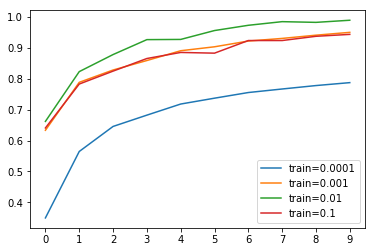

In [25]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

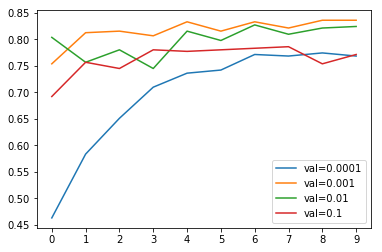

In [26]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

# Checkpointing

In [27]:
model.save_weights('model_v1.h5', save_format='h5')

In [28]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [29]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
96/96 [==============================] - 106s 1s/step - loss: 1.0757 - accuracy: 0.6343 - val_loss: 0.7135 - val_accuracy: 0.7830
Epoch 2/10
96/96 [==============================] - 104s 1s/step - loss: 0.6336 - accuracy: 0.7868 - val_loss: 0.6220 - val_accuracy: 0.8035
Epoch 3/10
96/96 [==============================] - 106s 1s/step - loss: 0.5084 - accuracy: 0.8354 - val_loss: 0.6038 - val_accuracy: 0.8006
Epoch 4/10
96/96 [==============================] - 109s 1s/step - loss: 0.4298 - accuracy: 0.8628 - val_loss: 0.5587 - val_accuracy: 0.8182
Epoch 5/10
96/96 [==============================] - 100s 1s/step - loss: 0.3717 - accuracy: 0.8866 - val_loss: 0.5611 - val_accuracy: 0.8035
Epoch 6/10
96/96 [==============================] - 98s 1s/step - loss: 0.3305 - accuracy: 0.8986 - val_loss: 0.5645 - val_accuracy: 0.8006
Epoch 7/10
96/96 [==============================] - 98s 1s/step - loss: 0.2943 - accuracy: 0.9172 - val_loss: 0.5526 - val_accuracy: 0.8211
Epoch 8/10
96/9

# Adding more layers

In [30]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [31]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 [==============================] - 123s 1s/step - loss: 1.3677 - accuracy: 0.5365 - val_loss: 0.9774 - val_accuracy: 0.6569
Epoch 2/10
96/96 [==============================] - 119s 1s/step - loss: 0.8318 - accuracy: 0.7184 - val_loss: 0.7177 - val_accuracy: 0.7889
Epoch 3/10
96/96 [==============================] - 113s 1s/step - loss: 0.6239 - accuracy: 0.7859 - val_loss: 0.6321 - val_accuracy: 0.8065
Epoch 4/10
96/96 [==============================] - 112s 1s/step - loss: 0.5078 - accuracy: 0.8338 - val_loss: 0.6575 - val_accuracy: 0.7918
Epoch 5/10
96/96 [==============================] - 109s 1s/step - loss: 0.4237 - accuracy: 0.8621 - val_loss: 0.5832 - val_accuracy: 0.8152
Epoch 6/10
96/96 [==============================] - 109s 1s/step - loss: 0.3650 - accuracy: 0.8889 - val_loss: 0.5729 - val_accuracy: 0.8182
Epoch 7/10
96/96 [==============================] - 108s 1s/step - loss: 0.3115 - accuracy: 0.9055 - val_loss: 0.5765 - val_accuracy: 0.8240
Epoch 8/10

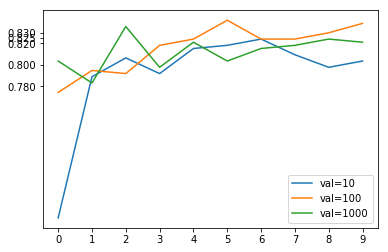

In [32]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

# Regularization and dropout

In [14]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [35]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
96/96 [==============================] - 112s 1s/step - loss: 0.9738 - accuracy: 0.6705 - val_loss: 0.6651 - val_accuracy: 0.7830
Epoch 2/30
96/96 [==============================] - 113s 1s/step - loss: 0.5270 - accuracy: 0.8145 - val_loss: 0.6014 - val_accuracy: 0.8006
Epoch 3/30
96/96 [==============================] - 119s 1s/step - loss: 0.3450 - accuracy: 0.8879 - val_loss: 0.5618 - val_accuracy: 0.8152
Epoch 4/30
96/96 [==============================] - 118s 1s/step - loss: 0.2728 - accuracy: 0.9136 - val_loss: 0.5937 - val_accuracy: 0.8152
Epoch 5/30
96/96 [==============================] - 118s 1s/step - loss: 0.1812 - accuracy: 0.9485 - val_loss: 0.5277 - val_accuracy: 0.8270
Epoch 6/30
96/96 [==============================] - 110s 1s/step - loss: 0.1355 - accuracy: 0.9641 - val_loss: 0.5513 - val_accuracy: 0.8152
Epoch 7/30
96/96 [==============================] - 111s 1s/step - loss: 0.0920 - accuracy: 0.9824 - val_loss: 0.6148 - val_accuracy: 0.8152
Epoch 8/3

Epoch 29/30
96/96 [==============================] - 114s 1s/step - loss: 0.0125 - accuracy: 0.9987 - val_loss: 0.7079 - val_accuracy: 0.8358
Epoch 30/30
96/96 [==============================] - 112s 1s/step - loss: 0.0170 - accuracy: 0.9958 - val_loss: 0.7805 - val_accuracy: 0.8358


0.5
Epoch 1/30
96/96 [==============================] - 114s 1s/step - loss: 1.2722 - accuracy: 0.5766 - val_loss: 0.7640 - val_accuracy: 0.7683
Epoch 2/30
96/96 [==============================] - 118s 1s/step - loss: 0.8188 - accuracy: 0.7148 - val_loss: 0.6287 - val_accuracy: 0.8065
Epoch 3/30
96/96 [==============================] - 117s 1s/step - loss: 0.6639 - accuracy: 0.7650 - val_loss: 0.5610 - val_accuracy: 0.7889
Epoch 4/30
96/96 [==============================] - 113s 1s/step - loss: 0.5769 - accuracy: 0.7992 - val_loss: 0.5615 - val_accuracy: 0.8182
Epoch 5/30
96/96 [==============================] - 108s 1s/step - loss: 0.4988 - accuracy: 0.8250 - val_loss: 0.5266 - val_accuracy: 0.8182
Epoch

Epoch 27/30
96/96 [==============================] - 109s 1s/step - loss: 0.6982 - accuracy: 0.7298 - val_loss: 0.6083 - val_accuracy: 0.8035
Epoch 28/30
96/96 [==============================] - 109s 1s/step - loss: 0.6741 - accuracy: 0.7379 - val_loss: 0.6327 - val_accuracy: 0.8035
Epoch 29/30
96/96 [==============================] - 109s 1s/step - loss: 0.7007 - accuracy: 0.7301 - val_loss: 0.6063 - val_accuracy: 0.8035
Epoch 30/30
96/96 [==============================] - 109s 1s/step - loss: 0.6781 - accuracy: 0.7357 - val_loss: 0.5750 - val_accuracy: 0.8006




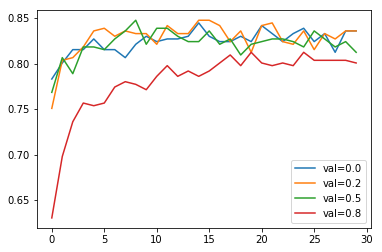

In [37]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.legend()

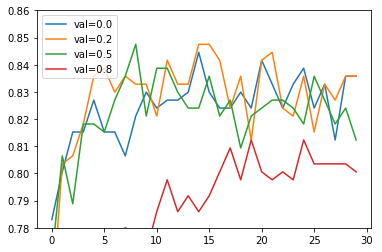

In [38]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

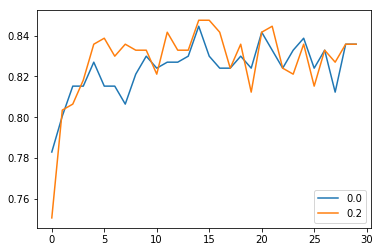

In [39]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

# Data augmentation

In [12]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    vertical_flip=True,     
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [15]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 [==============================] - 115s 1s/step - loss: 1.2760 - accuracy: 0.5629 - val_loss: 0.8363 - val_accuracy: 0.7185
Epoch 2/50
96/96 [==============================] - 112s 1s/step - loss: 0.8408 - accuracy: 0.7200 - val_loss: 0.6882 - val_accuracy: 0.7742
Epoch 3/50
96/96 [==============================] - 112s 1s/step - loss: 0.7041 - accuracy: 0.7601 - val_loss: 0.6755 - val_accuracy: 0.7947
Epoch 4/50
96/96 [==============================] - 112s 1s/step - loss: 0.6038 - accuracy: 0.7960 - val_loss: 0.6420 - val_accuracy: 0.7801
Epoch 5/50
96/96 [==============================] - 112s 1s/step - loss: 0.5370 - accuracy: 0.8158 - val_loss: 0.6549 - val_accuracy: 0.7742
Epoch 6/50
96/96 [==============================] - 111s 1s/step - loss: 0.4731 - accuracy: 0.8387 - val_loss: 0.6190 - val_accuracy: 0.7918
Epoch 7/50
96/96 [==============================] - 110s 1s/step - loss: 0.4456 - accuracy: 0.8504 - val_loss: 0.6409 - val_accuracy: 0.7918
Epoch 8/50
96

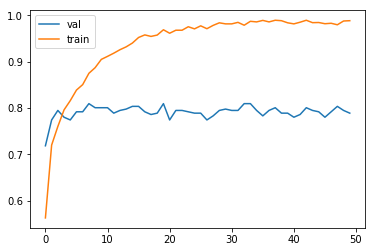

In [16]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

# Training a larger model

In [18]:
def make_model(input_size=299, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    
    base = keras.layers.GlobalAveragePooling2D()(base)
    
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(64, activation='relu')(vectors)
    
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [20]:
input_size=299

train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [21]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [22]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50
96/96 [==============================] - 1359s 14s/step - loss: 1.0298 - accuracy: 0.6695 - val_loss: 0.5438 - val_accuracy: 0.8240
Epoch 2/50
96/96 [==============================] - 522s 5s/step - loss: 0.5262 - accuracy: 0.8250 - val_loss: 0.4521 - val_accuracy: 0.8622
Epoch 3/50
96/96 [==============================] - 506s 5s/step - loss: 0.4412 - accuracy: 0.8507 - val_loss: 0.4154 - val_accuracy: 0.8592
Epoch 4/50
96/96 [==============================] - 482s 5s/step - loss: 0.3892 - accuracy: 0.8677 - val_loss: 0.3742 - val_accuracy: 0.9032
Epoch 5/50
96/96 [==============================] - 483s 5s/step - loss: 0.3486 - accuracy: 0.8807 - val_loss: 0.4049 - val_accuracy: 0.8739
Epoch 6/50
96/96 [==============================] - 483s 5s/step - loss: 0.3239 - accuracy: 0.8911 - val_loss: 0.3754 - val_accuracy: 0.8710
Epoch 7/50
96/96 [==============================] - 484s 5s/step - loss: 0.3048 - accuracy: 0.8960 - val_loss: 0.3660 - val_accuracy: 0.8798
Epoch 8/50


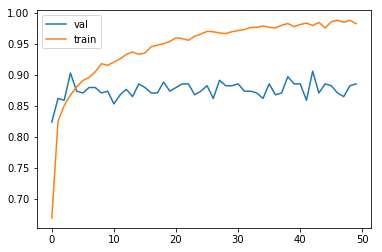

In [23]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

# Using the model

In [24]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [25]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [26]:
model = keras.models.load_model('xception_v4_1_43_0.906.h5')

In [27]:
model.evaluate(test_ds)

12/12 [==============================] - 47s 4s/step - loss: 0.2857 - accuracy: 0.8978


[0.28572532534599304, 0.897849440574646]

In [28]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [29]:
img = load_img(path, target_size=(299, 299))

In [30]:
import numpy as np

In [31]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

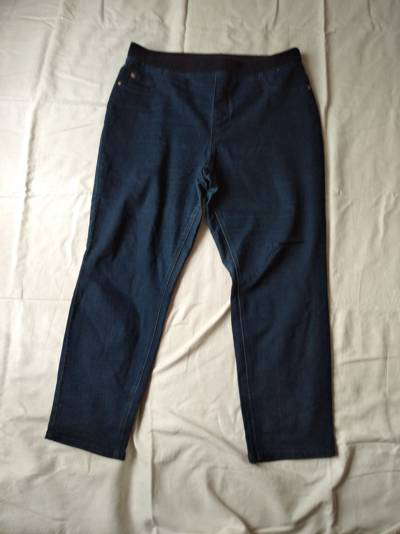

In [33]:
load_img(path)

In [34]:
X = preprocess_input(X)

In [35]:
pred = model.predict(X)

In [36]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [37]:
dict(zip(classes, pred[0]))

{'dress': -6.545744,
 'hat': -7.4961147,
 'longsleeve': -5.1561165,
 'outwear': -4.08252,
 'pants': 11.263188,
 'shirt': -5.316762,
 'shoes': -8.081409,
 'shorts': 4.200945,
 'skirt': -6.7825785,
 't-shirt': -6.666848}